___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 6<br><br>Image Classification with CNN<br><br>CIFAR-10 Data<br><h1>

# Dataset Info

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

Here are the classes in the dataset, as well as 10 random images from each:

![3Dto2D](https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  50000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

In [6]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

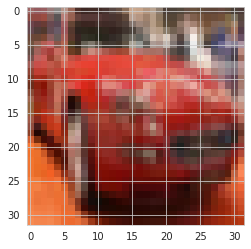

In [7]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [8]:
y_train[5]

array([1], dtype=uint8)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
y_train[0]

array([6], dtype=uint8)

In [14]:
classes[y_train[0][0]]

'frog'

In [15]:
classes[int(y_train[0])]

'frog'

In [16]:
#int(np.random.randint(low=0, high=50000, size=1))

In [17]:
#X_train[int(np.random.randint(low=0, high=50000, size=1))]

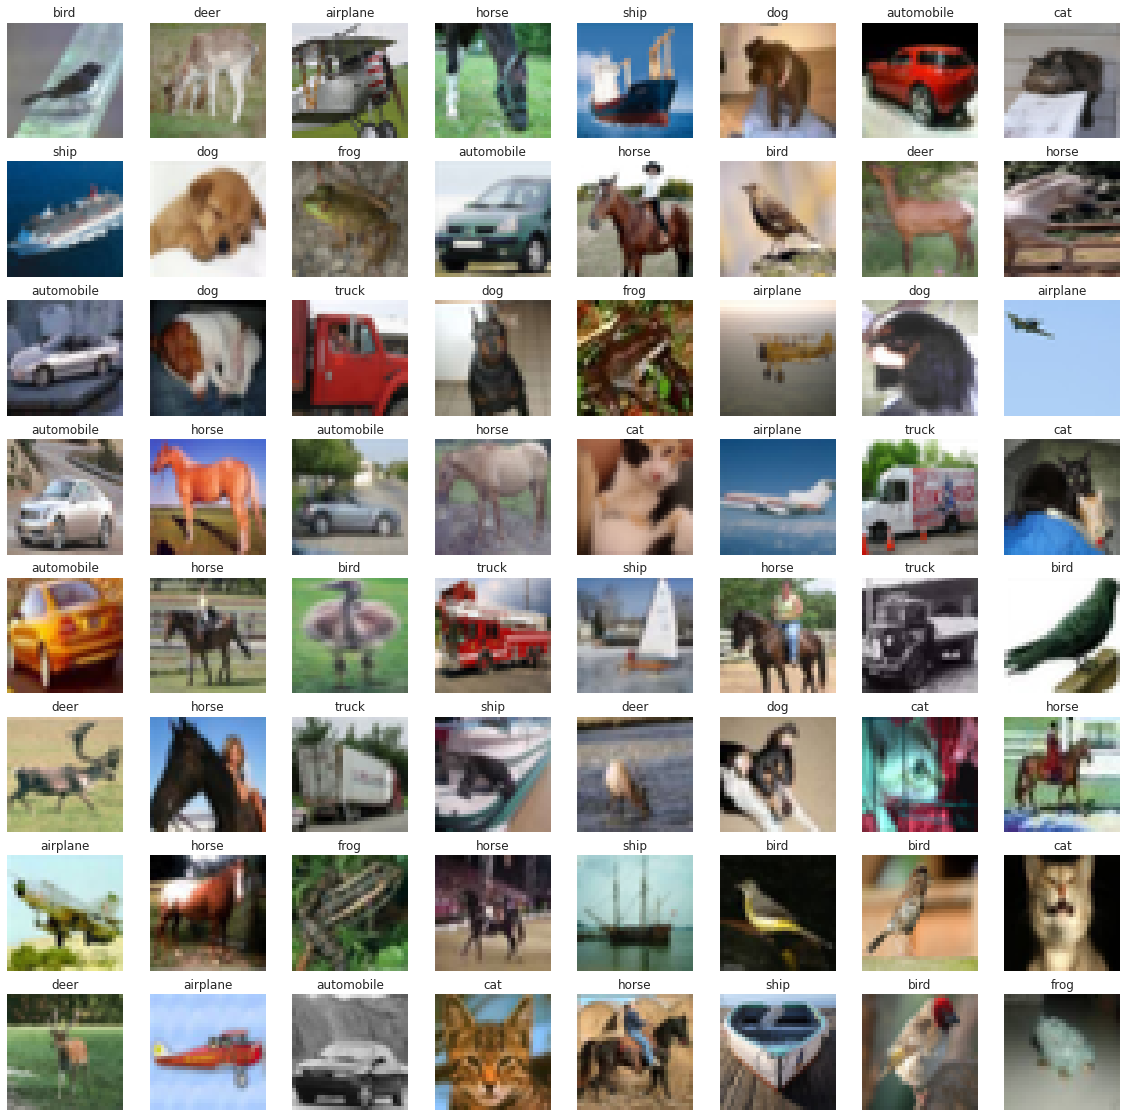

In [86]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

In [19]:
X_train[5].min()

0

In [20]:
X_train[5].max()

252

In [21]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [22]:
X_train[5].min()

0.0

In [23]:
X_train[5].max()

0.9882353

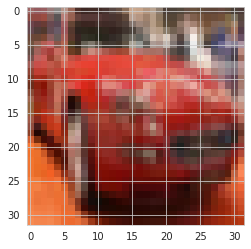

In [24]:
plt.imshow(X_train[5])

In [25]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [26]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [29]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Modelling-1

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [31]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [35]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 21s 8ms/step - loss: 1.4224 - accuracy: 0.4850 - val_loss: 1.2088 - val_accuracy: 0.5682
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0667 - accuracy: 0.6226 - val_loss: 0.9915 - val_accuracy: 0.6542
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9213 - accuracy: 0.6750 - val_loss: 0.9324 - val_accuracy: 0.6787
Epoch 4/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8309 - accuracy: 0.7077 - val_loss: 0.9052 - val_accuracy: 0.6839
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7554 - accuracy: 0.7349 - val_loss: 0.8919 - val_accuracy: 0.6948
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6902 - accuracy: 0.7604 - val_loss: 0.8716 - val_accuracy: 0.7018
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6312 - accuracy: 0.7809 - val_loss: 0.8958 - val_ac

In [36]:
model.metrics_names

['loss', 'accuracy']

In [37]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.422,0.485,1.209,0.568
1,1.067,0.623,0.992,0.654
2,0.921,0.675,0.932,0.679
3,0.831,0.708,0.905,0.684
4,0.755,0.735,0.892,0.695


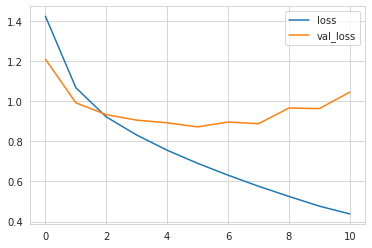

In [38]:
summary[["loss", "val_loss"]].plot();

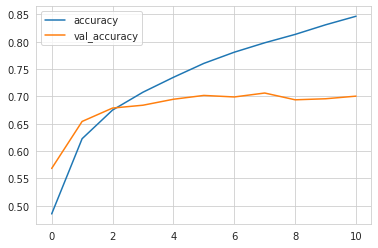

In [39]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.8716 - accuracy: 0.7018


[0.8715783357620239, 0.7017999887466431]

In [42]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8715783357620239
Test accuracy: 0.7017999887466431


In [43]:
pred_prob = model.predict(X_test)

In [44]:
y_pred = np.argmax(pred_prob, axis=1)

In [45]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.75      1000
           1       0.79      0.80      0.80      1000
           2       0.70      0.47      0.56      1000
           3       0.49      0.54      0.51      1000
           4       0.61      0.71      0.66      1000
           5       0.58      0.65      0.61      1000
           6       0.86      0.71      0.78      1000
           7       0.80      0.75      0.77      1000
           8       0.82      0.79      0.81      1000
           9       0.75      0.80      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [47]:
print(confusion_matrix(y_test, y_pred))

[[783  22  27  28  17   9   4  12  51  47]
 [ 22 803   8  17   4   4   6   1  21 114]
 [ 85   8 470  91 146  97  39  34  16  14]
 [ 29  20  34 541  90 191  28  27  18  22]
 [ 23   4  44  65 715  51  27  57  11   3]
 [ 18   5  27 188  47 653   8  35  11   8]
 [  6  14  33  97  81  35 715   3   9   7]
 [ 16   7  20  40  68  82   1 747   7  12]
 [ 81  46   5  21   9   6   1   4 787  40]
 [ 35  88   5  19   2   6   3  15  23 804]]


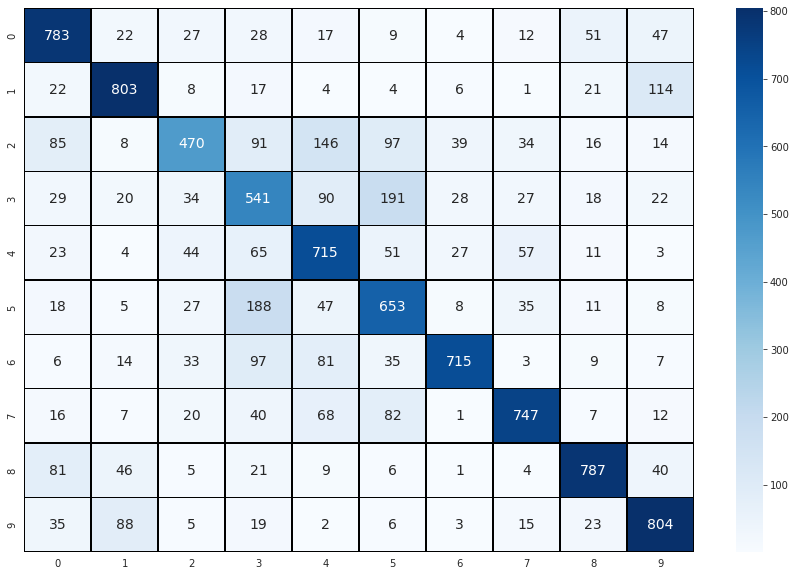

In [48]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

# Modelling-2

In [49]:
model= Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
        
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [51]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 22s 13ms/step - loss: 1.4450 - accuracy: 0.4754 - val_loss: 1.1107 - val_accuracy: 0.6180
Epoch 2/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0365 - accuracy: 0.6333 - val_loss: 0.9150 - val_accuracy: 0.6852
Epoch 3/50
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9024 - accuracy: 0.6829 - val_loss: 0.8365 - val_accuracy: 0.7086
Epoch 4/50
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8216 - accuracy: 0.7137 - val_loss: 0.8032 - val_accuracy: 0.7207
Epoch 5/50
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7613 - accuracy: 0.7330 - val_loss: 0.7961 - val_accuracy: 0.7273
Epoch 6/50
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7220 - accuracy: 0.7466 - val_loss: 0.7627 - val_accuracy: 0.7386
Epoch 7/50
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6846 - accuracy: 0.7588 - val_loss: 0.7454 -

In [52]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.445,0.475,1.111,0.618
1,1.037,0.633,0.915,0.685
2,0.902,0.683,0.836,0.709
3,0.822,0.714,0.803,0.721
4,0.761,0.733,0.796,0.727


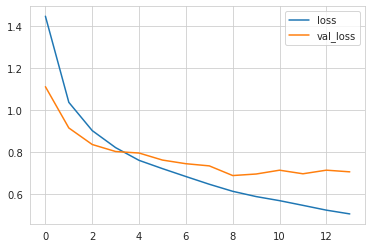

In [53]:
summary[["loss", "val_loss"]].plot();

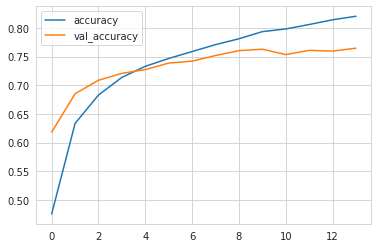

In [54]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [55]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.6893 - accuracy: 0.7603


[0.6892576217651367, 0.7602999806404114]

In [56]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6892576217651367
Test accuracy: 0.7602999806404114


In [57]:
pred_prob = model.predict(X_test)

In [58]:
y_pred = np.argmax(pred_prob, axis=1)

In [59]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1000
           1       0.93      0.84      0.88      1000
           2       0.66      0.68      0.67      1000
           3       0.63      0.47      0.54      1000
           4       0.75      0.68      0.71      1000
           5       0.63      0.75      0.68      1000
           6       0.78      0.84      0.81      1000
           7       0.81      0.81      0.81      1000
           8       0.81      0.90      0.85      1000
           9       0.80      0.87      0.84      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



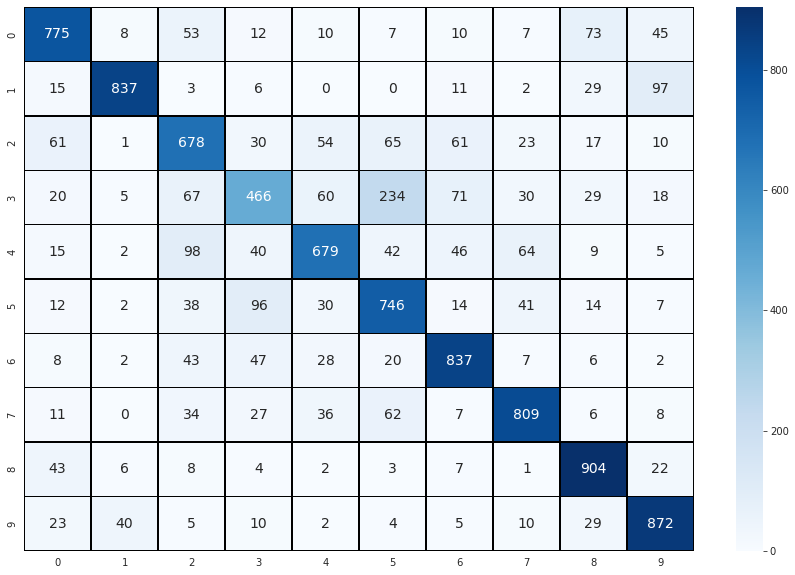

In [61]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

# Modelling-3

In [62]:
from tensorflow.keras.layers import BatchNormalization

**BatchNormalization**

- Layer that normalizes its inputs.
- Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
    - Technique for training very deep neural networks.
    - Standardizes the inputs to a layer for each mini-batch.
    - Stabilizes the learning process,
    - Reduces the number of training epochs.
![BN1.PNG](https://miro.medium.com/max/709/0*2qZOVh96GZ-a_XdS.png)
![BN2.PNG](https://cesarlaurent.files.wordpress.com/2015/04/bn.png)
![BN3.PNG](https://3.bp.blogspot.com/-ogeLSVo_Tek/WNPS4Glmd4I/AAAAAAAAKBo/bfp-KUSsFmQGolE0uNEeWFzDXA8IPU75wCLcB/s1600/Screenshot%2Bfrom%2B2017-03-23%2B21-50-33.png)

In [63]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [65]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 46s 27ms/step - loss: 1.9525 - accuracy: 0.3003 - val_loss: 1.5426 - val_accuracy: 0.4328
Epoch 2/50
1563/1563 [==============================] - 39s 25ms/step - loss: 1.4377 - accuracy: 0.4827 - val_loss: 1.6495 - val_accuracy: 0.4393
Epoch 3/50
1563/1563 [==============================] - 41s 26ms/step - loss: 1.2243 - accuracy: 0.5761 - val_loss: 0.9904 - val_accuracy: 0.6436
Epoch 4/50
1563/1563 [==============================] - 41s 26ms/step - loss: 1.0998 - accuracy: 0.6253 - val_loss: 0.9888 - val_accuracy: 0.6588
Epoch 5/50
1563/1563 [==============================] - 40s 26ms/step - loss: 1.0035 - accuracy: 0.6644 - val_loss: 0.7619 - val_accuracy: 0.7329
Epoch 6/50
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9300 - accuracy: 0.6930 - val_loss: 0.8113 - val_accuracy: 0.7192
Epoch 7/50
1563/1563 [==============================] - 40s 25ms/step - loss: 0.8765 - accuracy: 0.7112 - val_loss: 0.7126 -

In [66]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.952,0.300,1.543,0.433
1,1.438,0.483,1.649,0.439
2,1.224,0.576,0.990,0.644
3,1.100,0.625,0.989,0.659
4,1.004,0.664,0.762,0.733


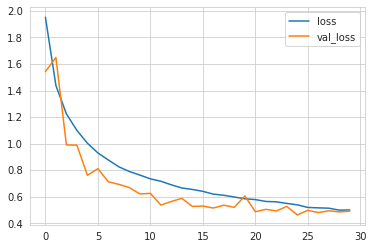

In [67]:
summary[["loss", "val_loss"]].plot();

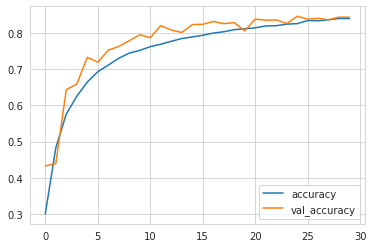

In [68]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [69]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.4631 - accuracy: 0.8462


[0.4631006717681885, 0.8461999893188477]

In [70]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4631006717681885
Test accuracy: 0.8461999893188477


In [71]:
pred_prob = model.predict(X_test)

In [72]:
y_pred = np.argmax(pred_prob, axis=1)

In [73]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1000
           1       0.91      0.95      0.93      1000
           2       0.76      0.78      0.77      1000
           3       0.76      0.63      0.69      1000
           4       0.83      0.84      0.84      1000
           5       0.80      0.74      0.77      1000
           6       0.84      0.91      0.87      1000
           7       0.89      0.89      0.89      1000
           8       0.90      0.92      0.91      1000
           9       0.91      0.92      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



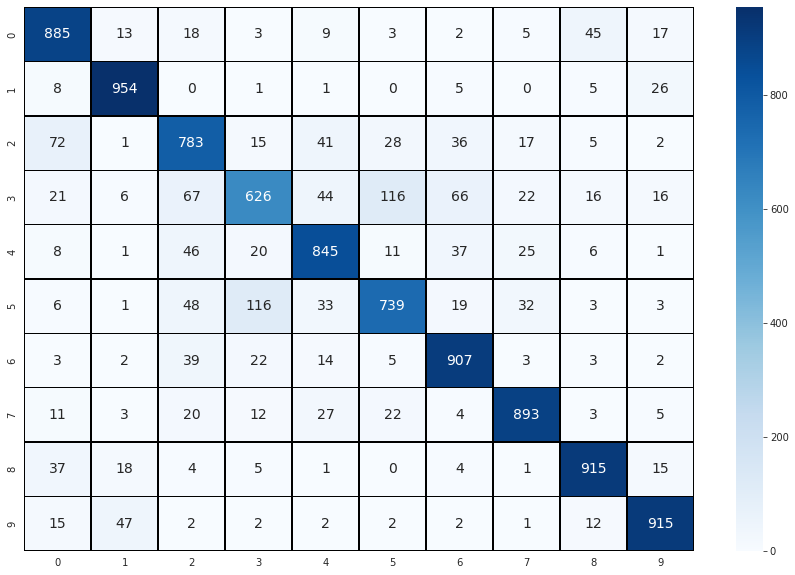

In [75]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

# Prediction

In [76]:
my_image = X_test[44]

In [77]:
my_image.shape

(32, 32, 3)

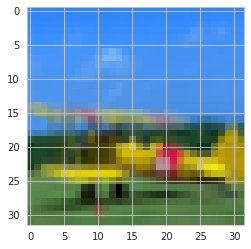

In [78]:
plt.imshow(my_image)

In [79]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

In [80]:
image_prediction

array([[9.9703491e-01, 4.6185750e-04, 5.5369007e-04, 8.1711092e-05,
        7.8472272e-05, 3.1356012e-05, 8.2695406e-05, 9.2875474e-05,
        8.0606469e-04, 7.7639491e-04]], dtype=float32)

In [81]:
np.argmax(image_prediction, axis=1)

array([0])

In [82]:
result=np.argmax(image_prediction, axis=1)

In [83]:
result

array([0])

In [84]:
classes[int(result)]

'airplane'

In [85]:
#model.save("cnn-1.h5")